Accuracy 0.74
              precision    recall  f1-score   support

         0.0       0.93      0.71      0.80       798
         1.0       0.48      0.84      0.61       259

    accuracy                           0.74      1057
   macro avg       0.71      0.77      0.71      1057
weighted avg       0.82      0.74      0.76      1057



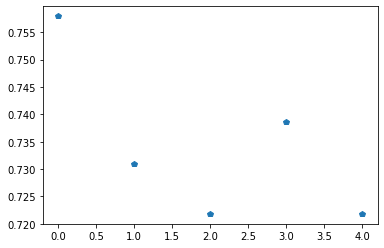

In [13]:
from numpy import genfromtxt

from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split, cross_validate

import numpy as np

from sklearn.impute import SimpleImputer

from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.metrics import classification_report

input_feature_matrix = genfromtxt('../RESOURCE/processed_data.csv', delimiter = ',', dtype = float, skip_header = 1, usecols = range(19))

output = genfromtxt('../RESOURCE/processed_data.csv', delimiter = ',', dtype = float, skip_header = 1, usecols = 19)

input_feature_matrix = SimpleImputer(missing_values=np.nan, strategy='mean').fit(input_feature_matrix).transform(input_feature_matrix)

trainX, testX, trainY, testY = train_test_split(input_feature_matrix, output, train_size = 0.85, test_size = 0.15, random_state = 1)

modelNaiveBayes = GaussianNB().fit(trainX, trainY)

predY = modelNaiveBayes.predict(testX)

modelNaiveBayesCV = cross_validate(modelNaiveBayes,trainX,trainY,cv = 5)

plt.plot(modelNaiveBayesCV['test_score'], "p")

print("Accuracy {:.2f}".format(accuracy_score(predY, testY)))

print(classification_report(testY, predY))